In [36]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference.ExactInference import VariableElimination

import networkx as nx
import numpy as np
from scipy.stats import binom

In [37]:
# a)

def game_simulation():
    starter = np.random.choice([0, 1])

    n = np.random.randint(1, 6)

    if starter == 0:
        p_heads = 4/7
        m = sum(1 for _ in range(2 * n) if np.random.random() < p_heads)
        winner = 0 if n >= m else 1
    else:
        p_heads = 1/2
        m = sum(1 for _ in range(2 * n) if np.random.random() < p_heads)
        winner = 1 if n >= m else 0

    return starter, winner

nr_simulatons = 10000

result = [game_simulation() for _ in range(nr_simulatons)]

p0_wins = sum(1 for _,winner in result if winner == 0)
p1_wins = sum(1 for _,winner in result if winner == 1)

p0_prob = p0_wins / nr_simulatons
p1_prob = p1_wins / nr_simulatons

print(f"Number of games won by P0: {p0_wins} Prob: {p0_prob}")
print(f"Number of games won by P1: {p1_wins} Prob: {p1_prob}")

if p0_prob > p1_prob:
    print("P0 is most likely to win")
else:
    print("P1 is most likely to win")

Number of games won by P0: 4373 Prob: 0.4373
Number of games won by P1: 5627 Prob: 0.5627
P1 is most likely to win


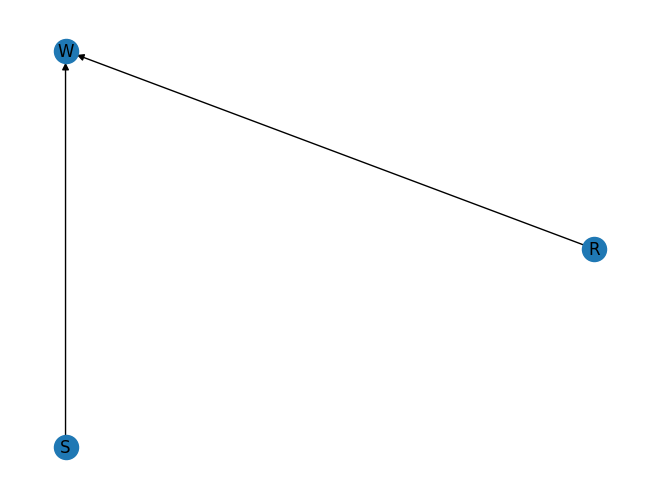

In [38]:
# b)

model = DiscreteBayesianNetwork([
    ('R', 'W'),
    ('S', 'W')
])

# Fair coin operation start.
cpd_S = TabularCPD(
    variable='S',
    variable_card=2,
    values=[[0.5], [0.5]],
)

# Roll operation.
cpd_R = TabularCPD(
    variable='R',
    variable_card=6,
    values=[[1/6]] * 6,
)

m_values = []
for m in range(13):
    m_row = []
    for s in [0, 1]:
        for n_val in range(1, 7):
            second_player = 1 - s
            p_heads = 0.5 if second_player == 0 else 4/7
            prob = binom.pmf(m, 2 * n_val, p_heads)
            m_row.append(prob)
    m_values.append(m_row)

cpd_W = TabularCPD(variable='W', variable_card=13, values=m_values,
                   evidence=['S', 'R'], evidence_card=[2, 6])

model.add_cpds(cpd_S, cpd_R, cpd_W)
assert model.check_model()

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos)

In [39]:
# c)

inference = VariableElimination(model)
result = inference.query(variables=['S'], evidence={'W': 1})
print(result)

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.4529 |
+------+----------+
| S(1) |   0.5471 |
+------+----------+
